# Glass Identification Project

![image](https://hips.hearstapps.com/hmg-prod/images/genovantiquaria-royalty-free-image-1683747707.jpg?resize=1200:*)

# Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
### Attribute Information-
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
* building_windows_float_processed
* building_windows_non_float_processed
* vehicle_windows_float_processed
* vehicle_windows_non_float_processed (none in this database)
* containers
* tableware
* headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass

# Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv


# Import Important Libraries 

In [9]:
import pandas as pd
import numpy as np 
from sklearn import datasets
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Importing datasets 
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Adding meaningful column/attribute names

In [16]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Exploring Datasets

In [17]:
df.shape

(214, 11)

In [18]:
df.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [23]:
df['glass_type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

glass_type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


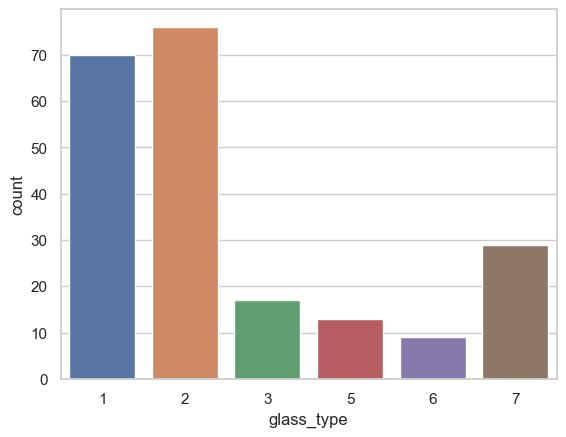

In [28]:
# Counting Number of values belonging to each class

ax = sns.countplot(x='glass_type', data=df)
print(df['glass_type'].value_counts())

As we can see The dataset is very very unbalanced.

The occurrences of types 1 and 2 constitute more than 67 % of the glass types.

# Data Preprocessing

In [29]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Removing Unnecessary columns

In [35]:
df = df.drop(columns=['Id'])

In [36]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Descriptive statistics

Summarizing the distribution of the numerical variables.

In [38]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Above statistics shows that data is across all attributes is not in same range, so we will have to normalize the data first

The features are not on the same scale. I.e. Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check the distribution of the glass types.

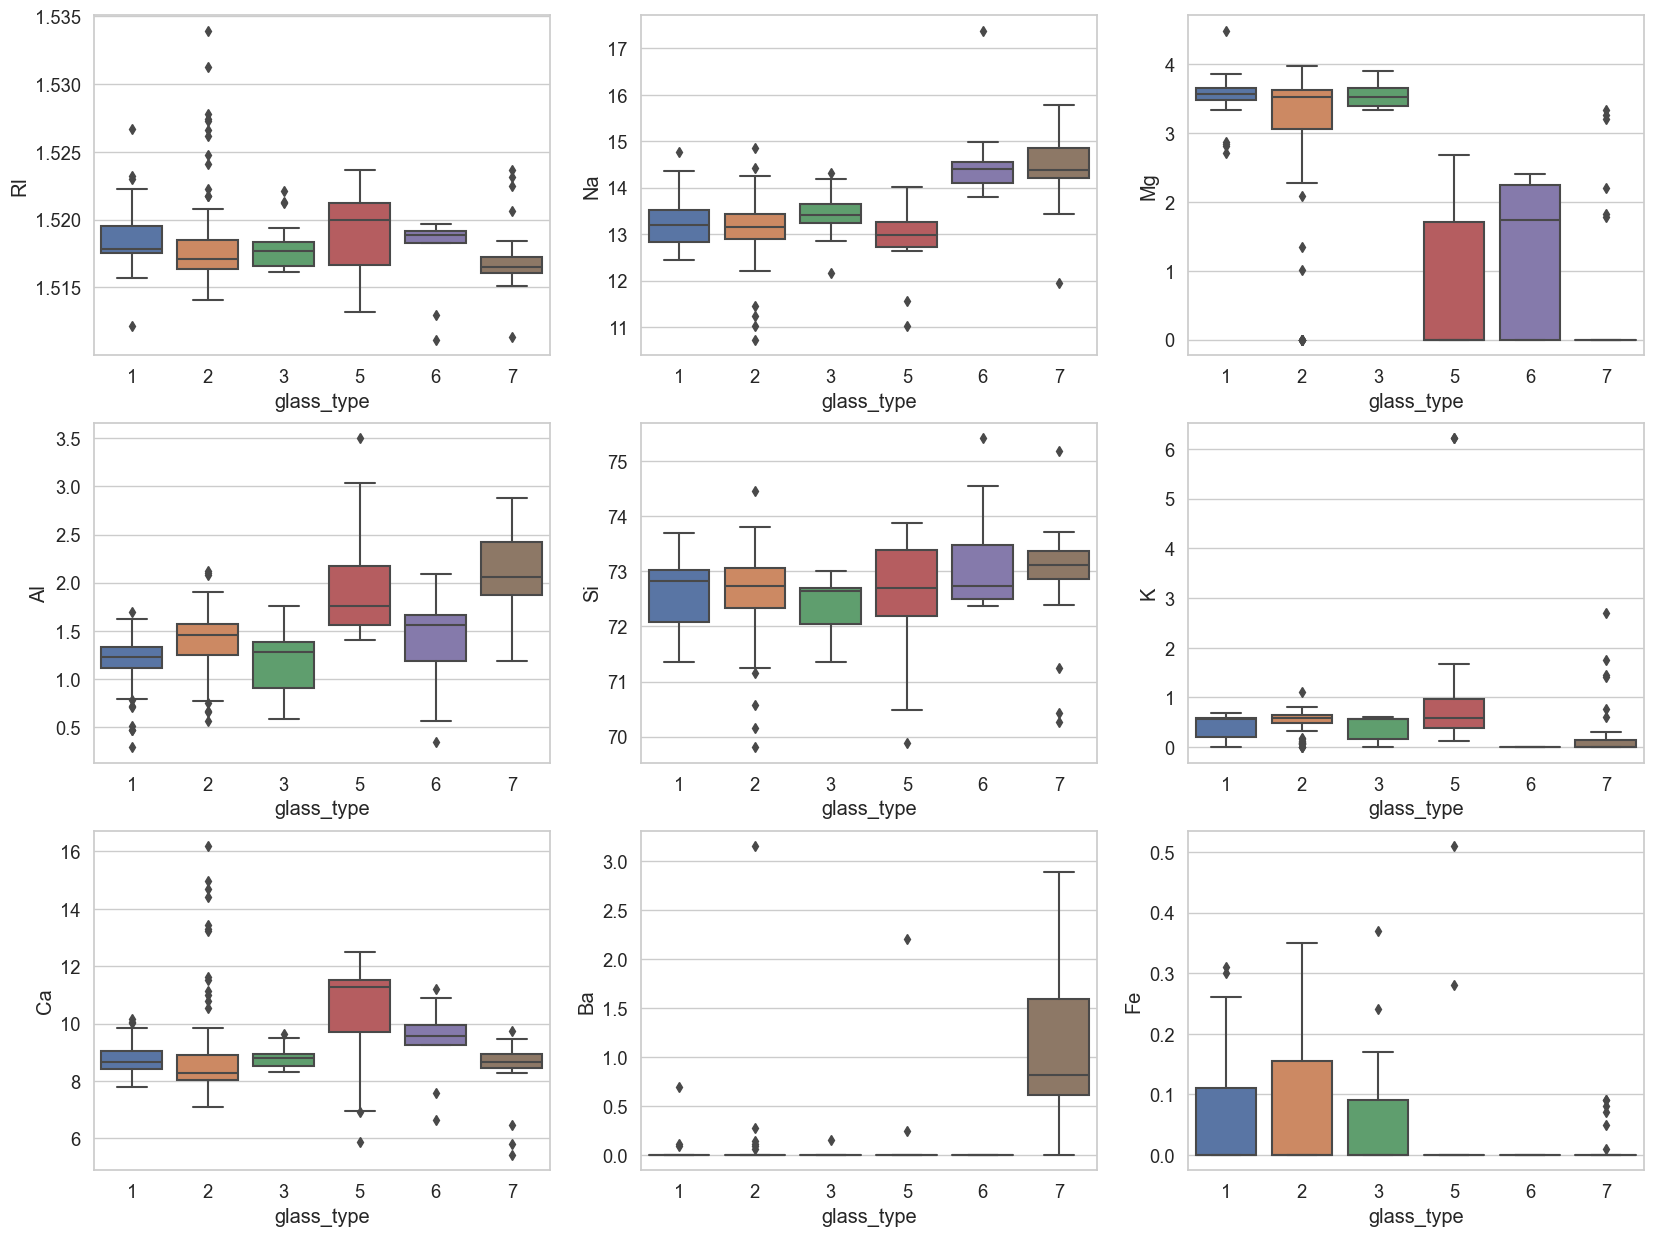

In [64]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='glass_type', y='RI', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='glass_type', y='Na', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='glass_type', y='Mg', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='glass_type', y='Al', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='glass_type', y='Si', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='glass_type', y='K', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='glass_type', y='Ca', data=df)
plt.subplot(3,3,8)
sns.boxplot(x='glass_type', y='Ba', data=df)
plt.subplot(3,3,9)
sns.boxplot(x='glass_type', y='Fe', data=df)
plt.show()

The box plot shows that average Refractive index is similar for all types. Although, Type 5 has a wider range and slightly higher mean. Sodium content is higher in Type 6 & 7, whereas Magnesium content is fairly high in Type 1, 2 & 3. Aluminium is higher in type 5 & 7. Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. Potassium also doesn't provide much insight. But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items. Calcium is highest in type 5 and Barium in type 7. Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values for some glasses than the rest. This is because Iron is added mainly in colored glasses.

We got some idea on which feature provides more insight in differentiating one type from another. Now, let's see the relationship between each one of them through a pairplot. (We will leave out K, Ba and Fe due to sparse concentration)

# Data Visualization

# 1. Using Univariate Plots

In [41]:
# Seprating Class labels and Features

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = df[features]

y = df[label]

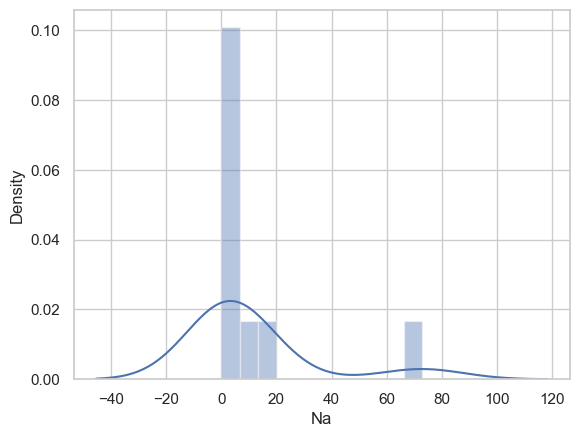

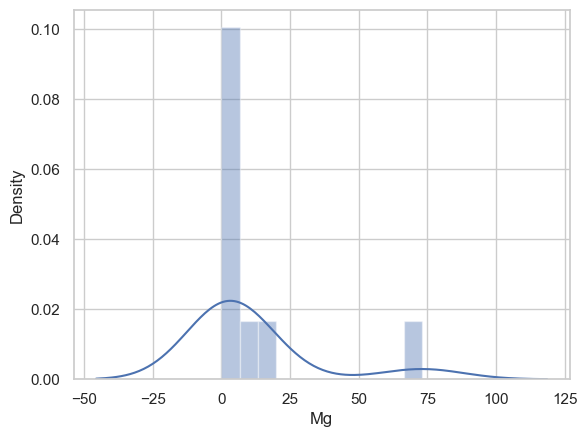

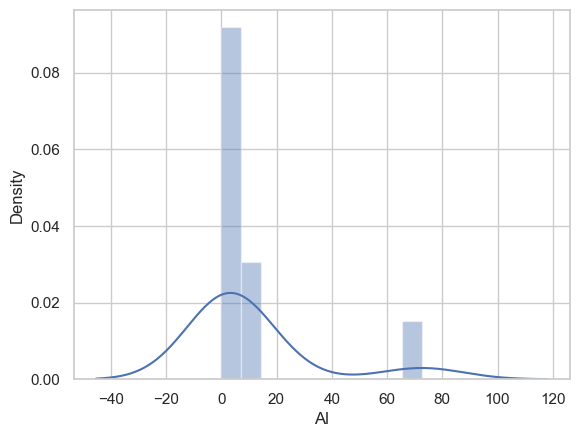

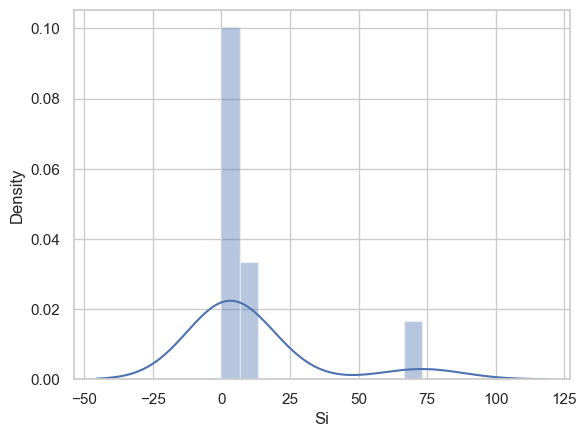

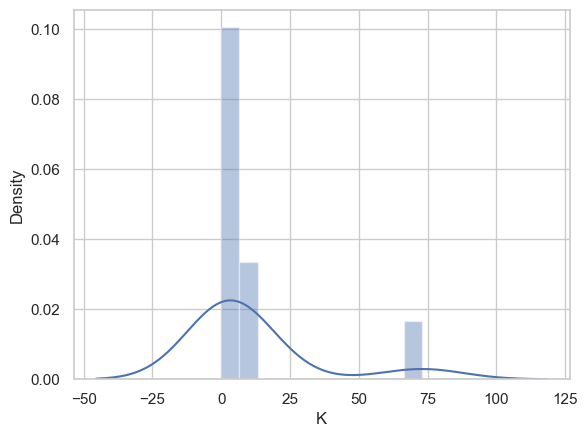

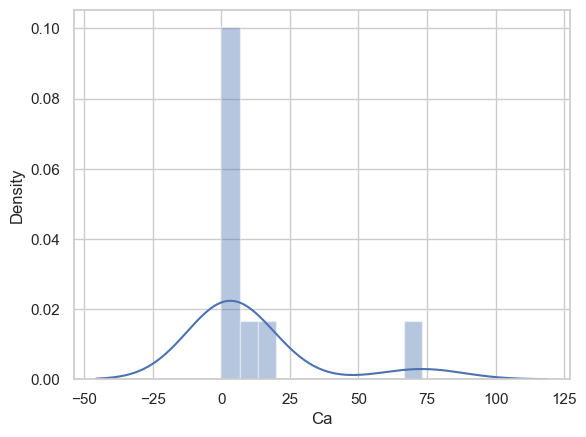

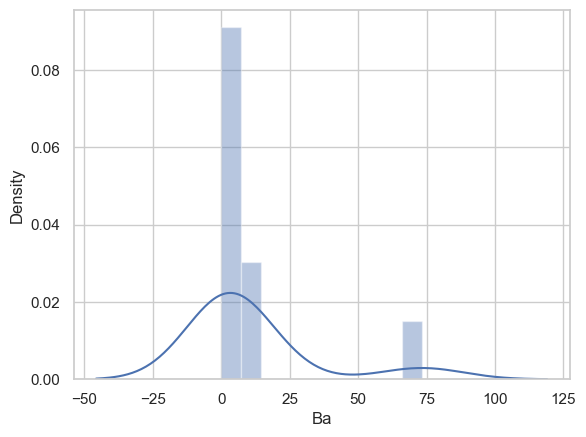

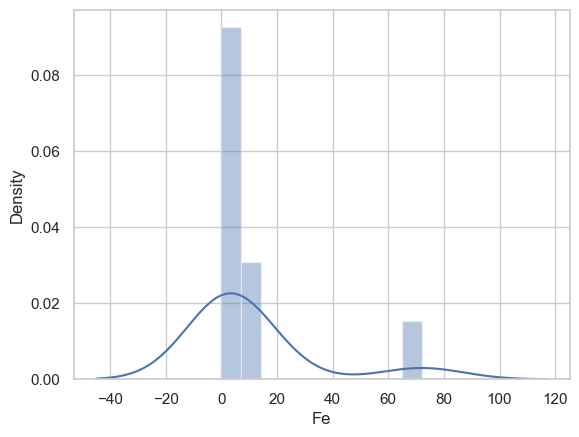

In [42]:
x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

## Outcomes

1. Our dataset is skewed either on positive side or negative side and data is not normalized.

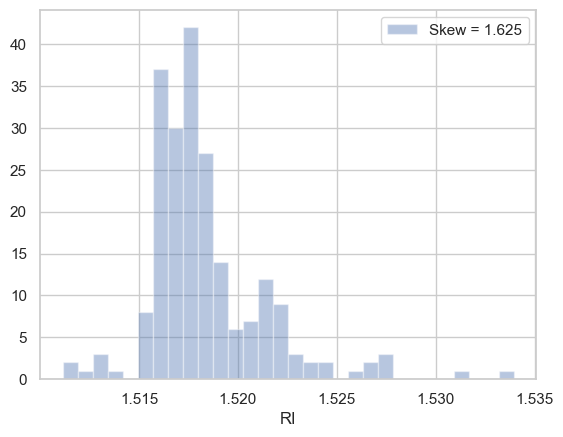

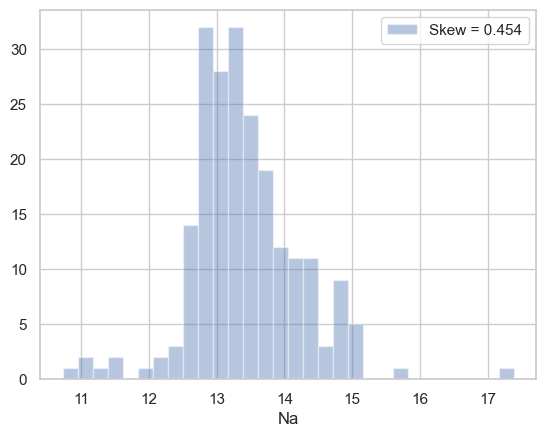

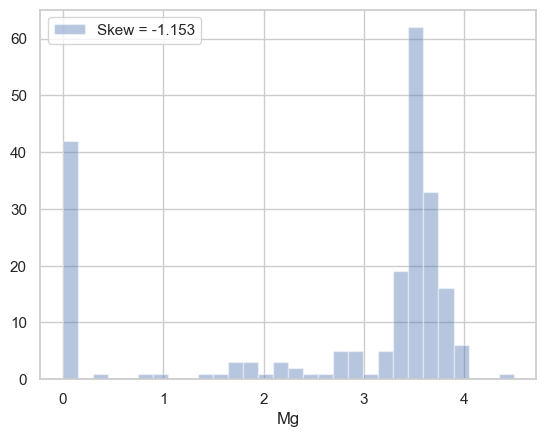

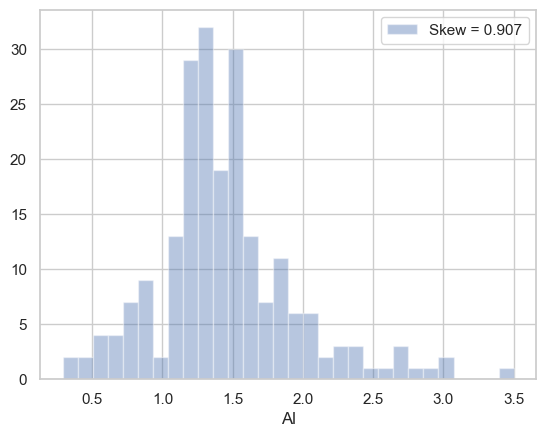

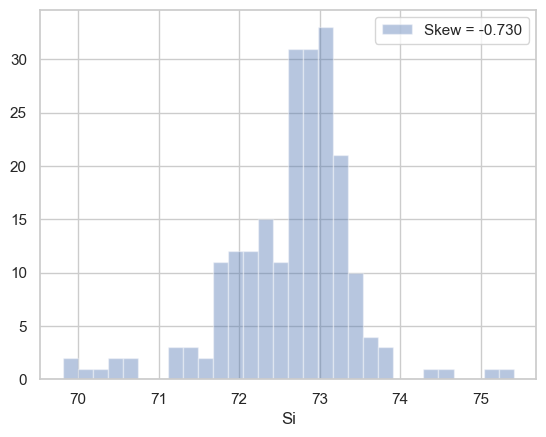

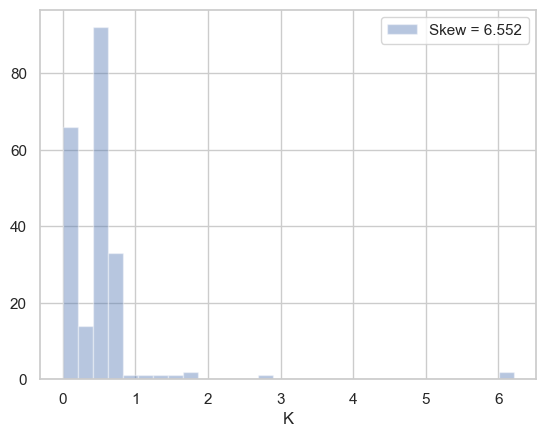

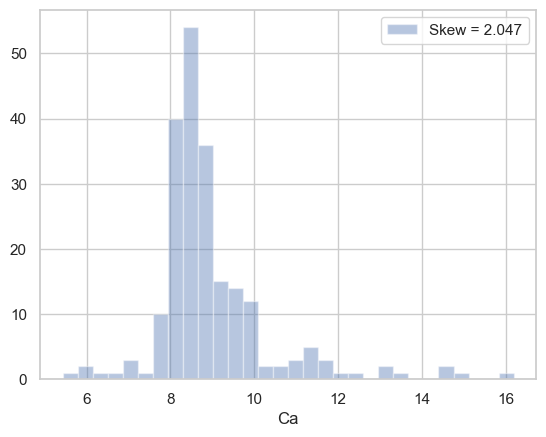

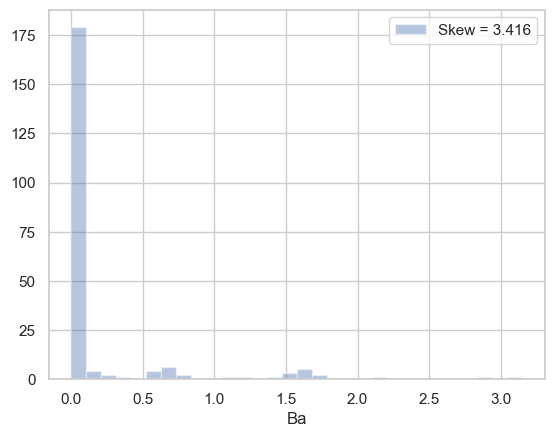

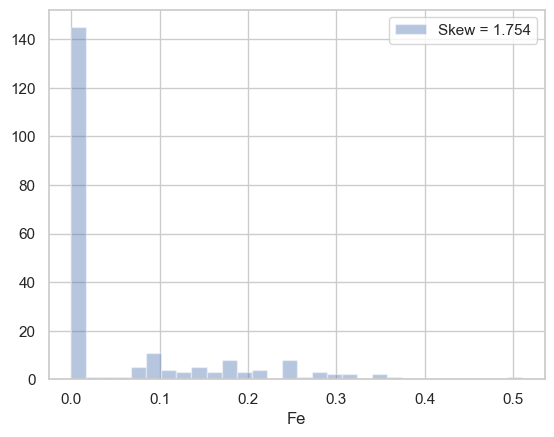

In [44]:
#Trying to gain more Insights about the data

for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

## Outcomes

1. The distribution of potassium (K) and Barium (Ba) seem to contain many outliers.
2. The features Fe, Ba, Ca and K are Highly Skewed (They have High skew coefficients).
3. None of the features follow Normal Distribution (are not normally distributed).

# 2. Using Multivariate Plots

<Figure size 800x800 with 0 Axes>

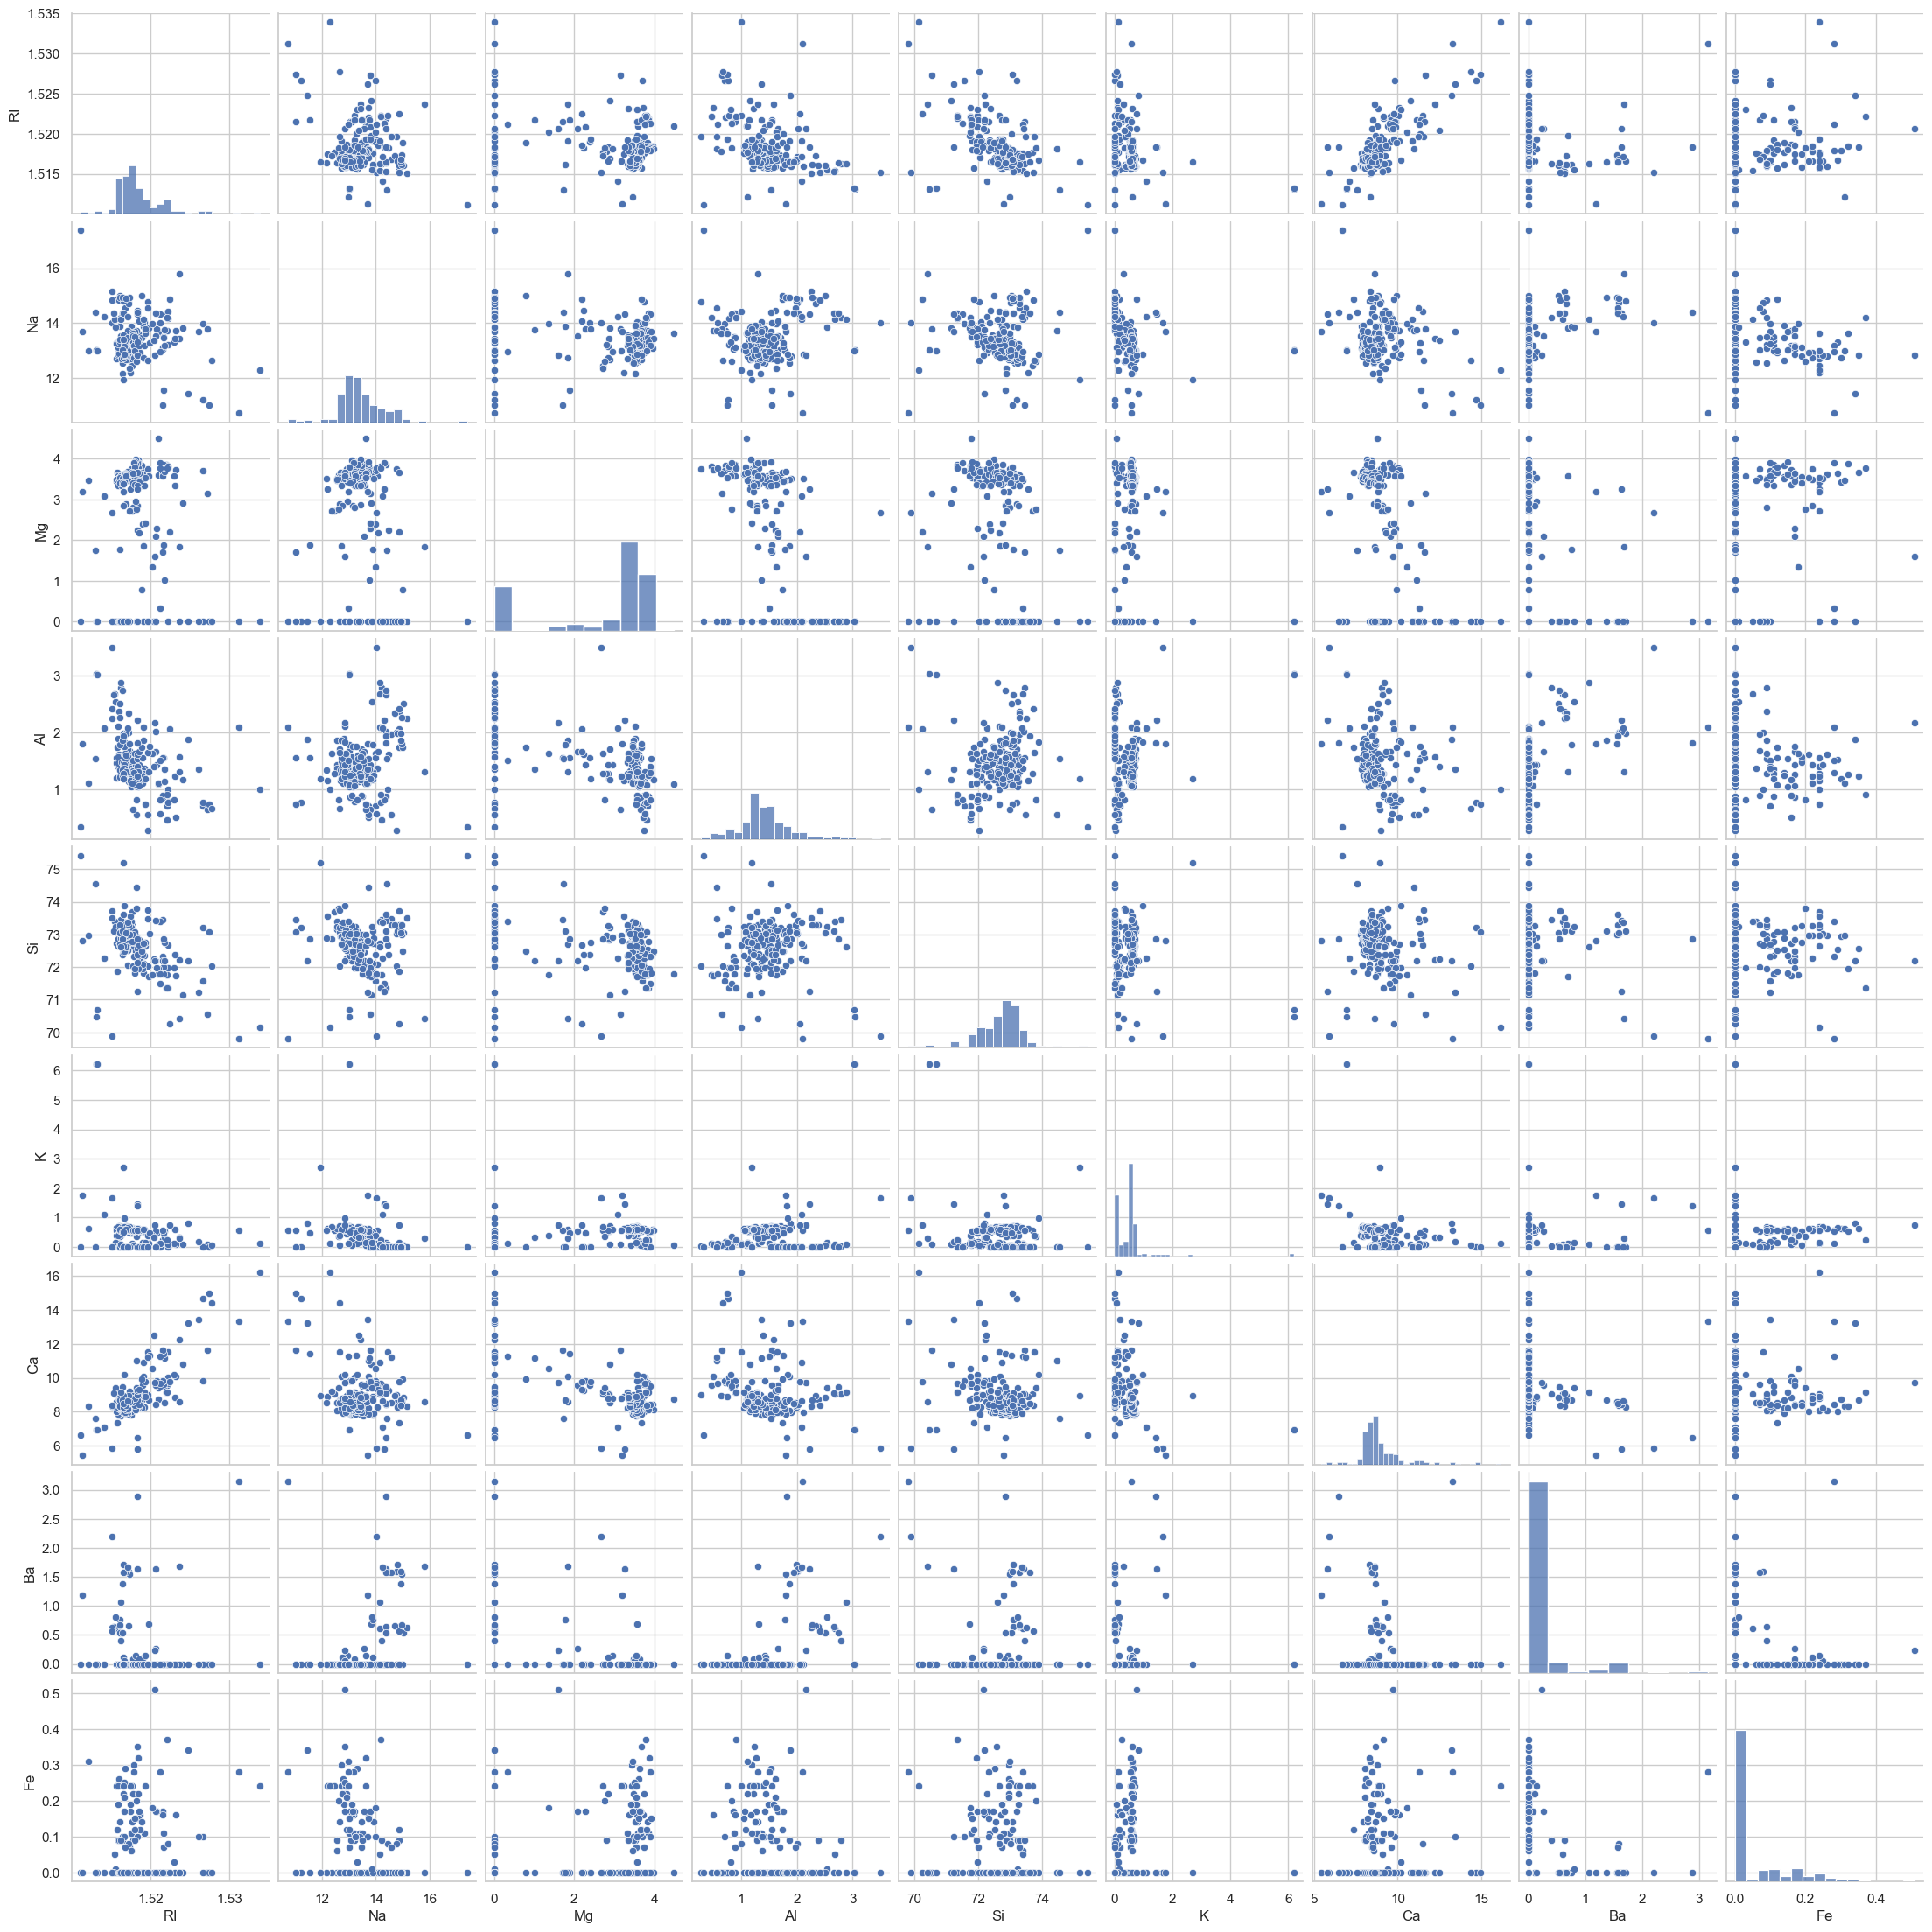

In [46]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

# 3. Using Correlation Matrix

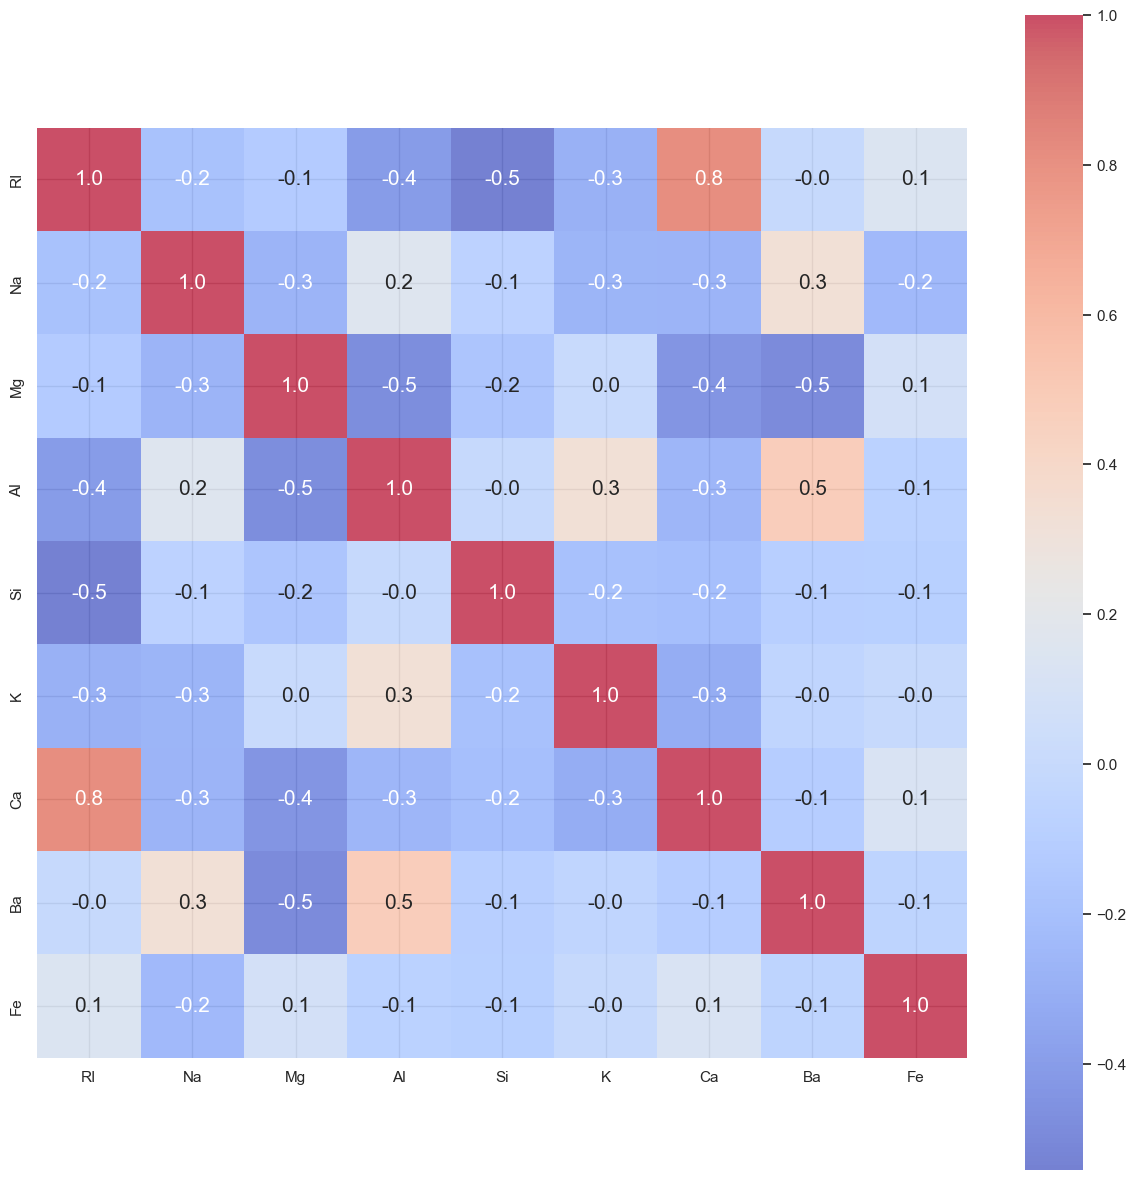

In [47]:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

# Outcomes

1. AI and Ba have intermediate correlation between each other.
2. RI and Ca have strong correlation between each other. ( This could be a sign to perform Principal component analysis in order to decorrelate some of the input features. )

# Outlier Detection

In [61]:
# Detect observations with more than one outlier
from collections import Counter

def outlier_hunt(df, features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [k for k, v in outlier_indices.items() if v > 2]

    return multiple_outliers


features = df.columns.tolist()

print('The dataset contains %d observations with more than 2 outliers' % (len(outlier_hunt(df, features))))

The dataset contains 25 observations with more than 2 outliers


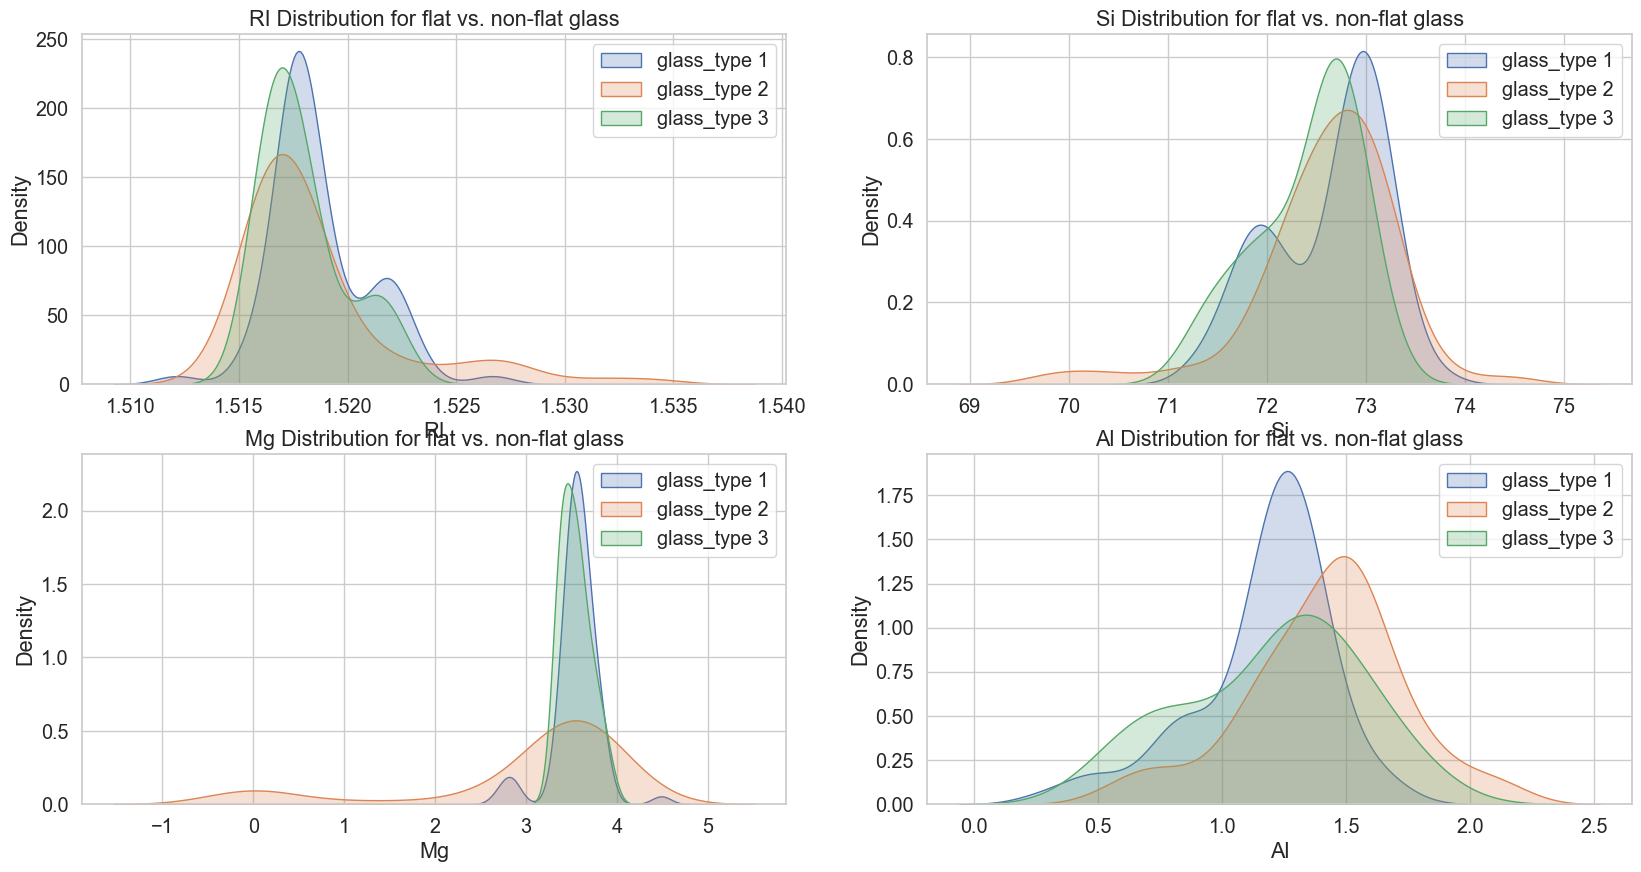

In [65]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(df["RI"][df.glass_type == 1], shade = True)
sns.kdeplot(df["RI"][df.glass_type == 2], shade = True)
sns.kdeplot(df["RI"][df.glass_type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['glass_type 1', 'glass_type 2', 'glass_type 3'])
plt.subplot(2,2,2)
sns.kdeplot(df["Si"][df.glass_type == 1], shade = True)
sns.kdeplot(df["Si"][df.glass_type == 2], shade = True)
sns.kdeplot(df["Si"][df.glass_type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['glass_type 1', 'glass_type 2', 'glass_type 3'])
plt.subplot(2,2,3)
sns.kdeplot(df["Mg"][df.glass_type == 1], shade = True)
sns.kdeplot(df["Mg"][df.glass_type == 2], shade = True)
sns.kdeplot(df["Mg"][df.glass_type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['glass_type 1', 'glass_type 2', 'glass_type 3'])
plt.subplot(2,2,4)
sns.kdeplot(df["Al"][df.glass_type == 1], shade = True)
sns.kdeplot(df["Al"][df.glass_type == 2], shade = True)
sns.kdeplot(df["Al"][df.glass_type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['glass_type 1', 'glass_type 2', 'glass_type 3'])

Mostly the flat ones (1,3) overlap on all the properties except Aluminium. Aluminium has a wider range for type 3 than type 1. The non-float glass, type 2 has many extreme points which make its range very high.

# Feature Selection using PCA

Let us plot a correlation heatmap to identify multicollinearity

<Axes: >

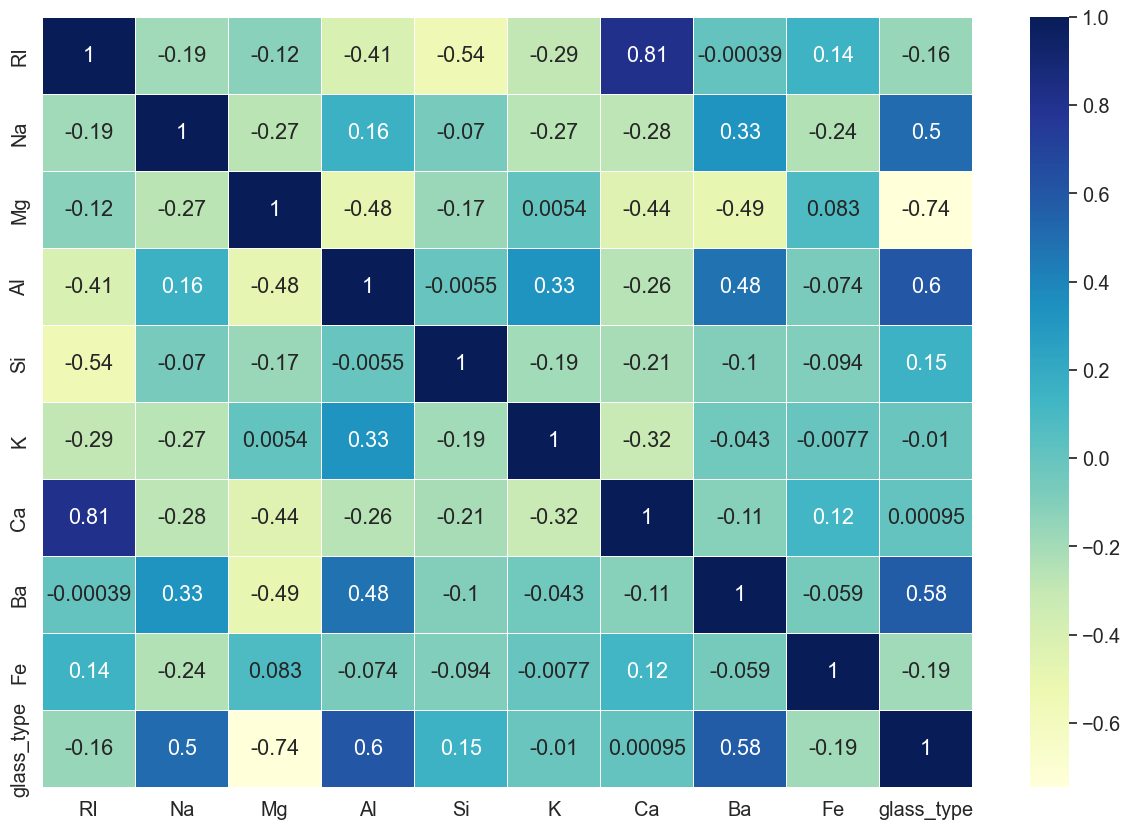

In [66]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

As seen in the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative. But since this is a classification technique and not regression, we cannot simply remove the collinear variables from the model, as they might be able to explain the difference between the target labels.

Let us look at a powerful method called Principal component analysis to decide on the candidate variables. This is valuable as it can help in dimension reduction and lower the cost of data collection.

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


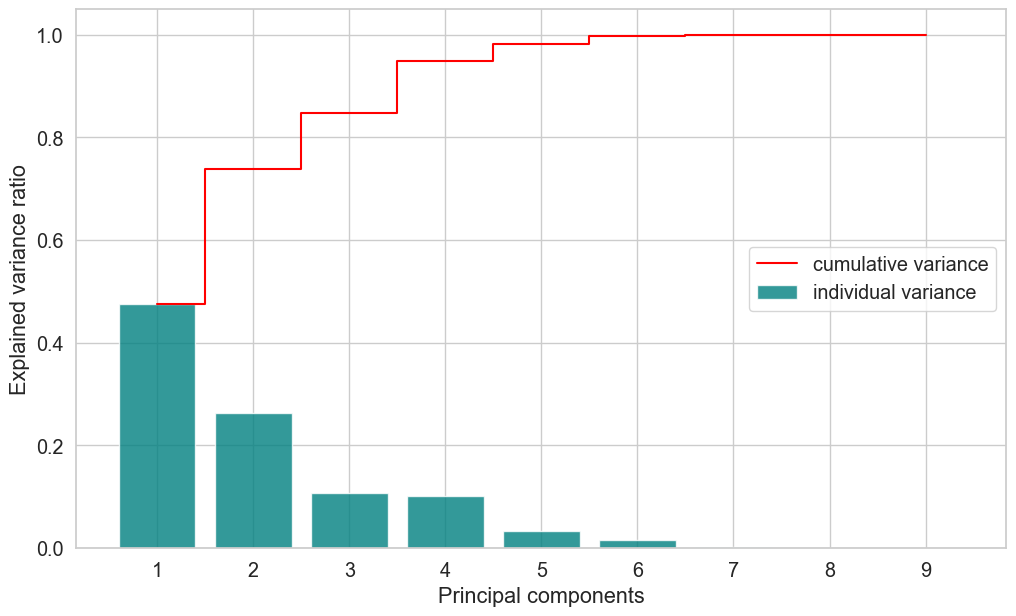

In [67]:
# Performing PCA
X_var = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

The first 5 components account for about 99% of the total explained variance. We can run the analysis again only with these five components.

In [68]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

Now that we have our features and target labels, let us proceed to model development.

# Model Development

In [69]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = df["glass_type"].values

In [70]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


# Testing Candidate models

In [77]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

In [80]:
# Map class labels
label_mapping = {1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5}
vectorized_mapping = np.vectorize(label_mapping.get)

y_train_mapped = vectorized_mapping(y_train)
y_test_mapped = vectorized_mapping(y_test)

# XGBoost Classifier
xgbMod = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.05, random_state=1)
xgbMod.fit(X_train, y_train_mapped)
y_pred = xgbMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred, y_test_mapped)

In [81]:
# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

In [82]:
# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

In [83]:
# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)

In [85]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(xgbMod.feature_importances_)
print(gbmMod.feature_importances_)

[0.19432955 0.33524074 0.18578587 0.24559234 0.03905151]
[0.31377335 0.32296928 0.05489302 0.21178263 0.09658172]
[0.21751475 0.3157317  0.14118302 0.19122756 0.13434298]
[0.3352154  0.28779865 0.13393196 0.17160844 0.07144555]


In [86]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['XG Boost',sc2],['Gradient Boost',sc3],
                             ['Decision Tree',sc4],['Random Forest',sc5]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.753846
1,XG Boost,0.707692
2,Gradient Boost,0.676923
3,Decision Tree,0.661538
4,Random Forest,0.738462


SVM gives the highest accuracy and all the features seem to be important from the other models. So, we will retain SVM as our final model and perform hyperparameter tuning to improve it.

# Hyperparameter tuning

In [87]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


# Running final model

In [88]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.6923076923076923

# Model Performance

Text(269.25, 0.5, 'predicted label')

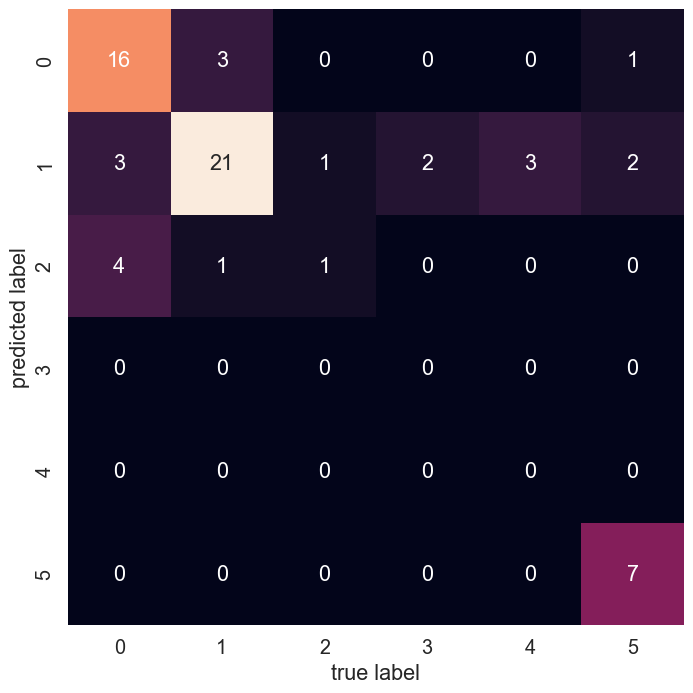

In [89]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.70      0.74        23
           2       0.66      0.84      0.74        25
           3       0.17      0.50      0.25         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       1.00      0.70      0.82        10

    accuracy                           0.69        65
   macro avg       0.44      0.46      0.43        65
weighted avg       0.69      0.69      0.68        65

